In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sidetable as stb

import warnings
warnings.filterwarnings('ignore')
 
from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
df =pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


## Getting all unique value every columns

In [6]:
for column in df.columns:
    print(f"{column} :")
    print(df[column].unique())
    print("")

RowNumber :
[    1     2     3 ...  9998  9999 10000]

CustomerId :
[15634602 15647311 15619304 ... 15584532 15682355 15628319]

Surname :
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

CreditScore :
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 81

# Investigating our Target Features 

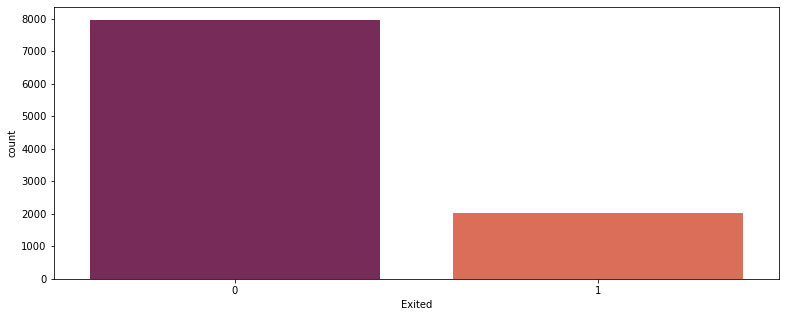

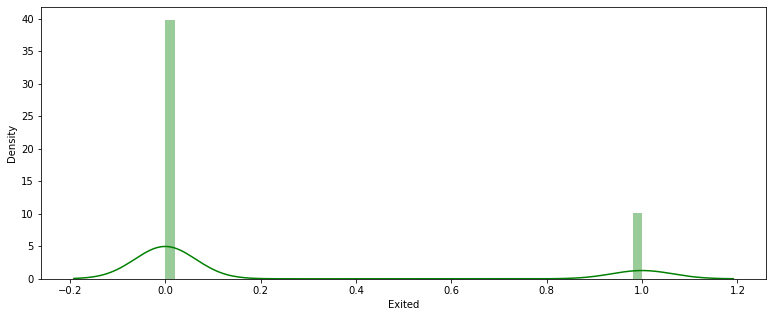

   Exited  count  percent
0       0   7963    79.63
1       1   2037    20.37

 Only 20.37% of our customers who got tendency to quit.


In [7]:
plt.figure(figsize = (13, 5))
sns.countplot(df['Exited'], palette = 'rocket')
plt.show()
plt.figure(figsize = (13, 5))
sns.distplot(df['Exited'], color='green')
plt.show()

print(df.stb.freq(['Exited'], cum_cols = False))
print('\n Only 20.37% of our customers who got tendency to quit.')

## Since the majority is not reaching 80%, we assume the dataset is condierably balance. Furthermore we can use accuracy score to score our models.

## Data Preprocessing

### LABEL ENCODING

#### Gender

In [8]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df['Gender_encode']=df['Gender'].map({'Male':0,"Female":1})
df.drop(columns=['Gender'],inplace=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encode
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1


### One Hot Encoding

#### Geography

In [10]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df=pd.get_dummies(data=df,columns=['Geography'])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encode,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1


## Showing Correlation in order to select our columns to be featured on our machine learning

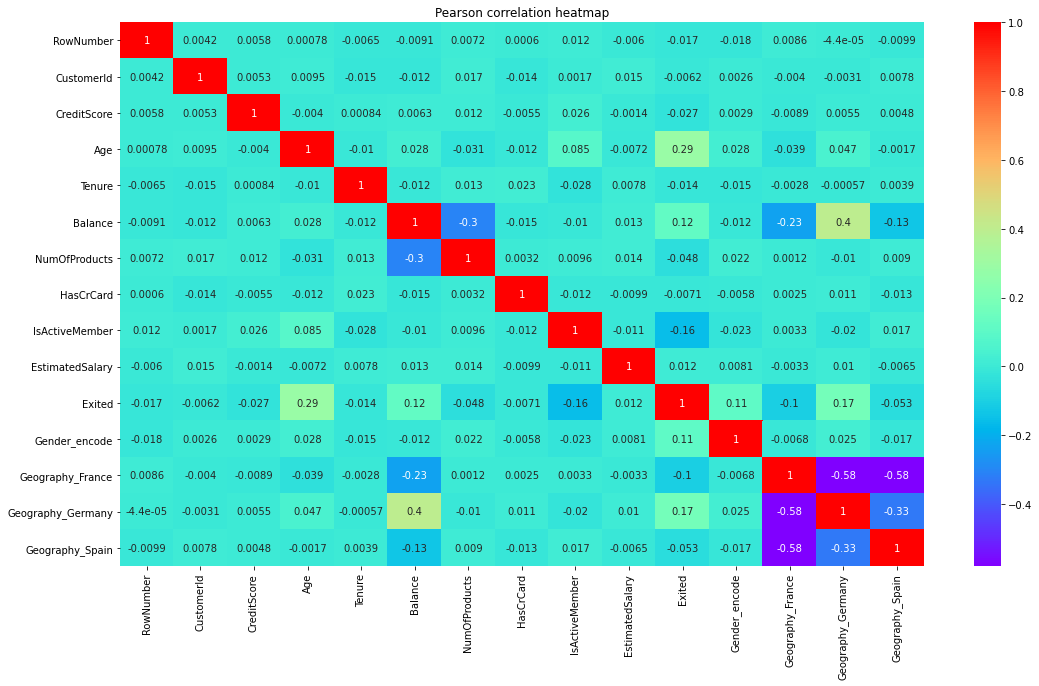

In [12]:
df.corr()

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')
plt.title('Pearson correlation heatmap')
plt.show()

In [13]:
df.drop(columns=['Surname','RowNumber','CustomerId','Tenure','Age','NumOfProducts','HasCrCard'],
       inplace=True)

In [14]:
df.head()

,CreditScore,Balance,IsActiveMember,EstimatedSalary,Exited,Gender_encode,Geography_France,Geography_Germany,Geography_Spain
0,619,0.00,1,101348.88,1,1,1,0,0
1,608,83807.86,1,112542.58,0,1,0,0,1
2,502,159660.80,0,113931.57,1,1,1,0,0
3,699,0.00,0,93826.63,0,1,1,0,0
4,850,125510.82,1,79084.10,0,1,0,0,1


## SPLITTING DATA

In [15]:
from sklearn.model_selection import train_test_split

x= df.drop(columns='Exited')
y=df['Exited']

x_train,x_test,y_train,y_test= train_test_split(x,y,train_size= 0.8,stratify=y,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor


from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,accuracy_score

# Machine Learning Modelling

## BASE MODEL

## Logistic Regression

In [19]:
modelLogreg= LogisticRegression()

modelLogreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
Logreg_pred=modelLogreg.predict(x_test)
Logreg_pred_train=modelLogreg.predict(x_train)

#### Checking the data, whether it is overfit/underfit

In [21]:
print('train score: ',accuracy_score(y_train,Logreg_pred_train))
print('test score: ',accuracy_score(y_test,Logreg_pred))

train score:  0.79625
test score:  0.7965


#### The Logistic Models seems good (It is overfit nor underfit)

## XGBoost Classifier

In [24]:
model_XGB = XGBClassifier()

model_XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
XGB_pred=model_XGB.predict(x_test)
XGB_pred_train=model_XGB.predict(x_train)

In [28]:
print('train score: ',accuracy_score(y_train,XGB_pred_train))
print('test score: ',accuracy_score(y_test,XGB_pred))

train score:  0.891875
test score:  0.786


#### The XG Boost Models seems good (It is overfit nor underfit)

## K- Nearest Neighbors

In [32]:
model_KNN = KNeighborsClassifier()

model_KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
KNN_pred=model_KNN.predict(x_test)
KNN_pred_train=model_KNN.predict(x_train)

In [34]:
print('train score: ',accuracy_score(y_train,KNN_pred_train))
print('test score: ',accuracy_score(y_test,KNN_pred))

train score:  0.816125
test score:  0.764


## Base Model - Evaluation Matrix

### Logistic Regression

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



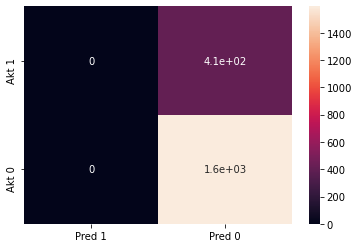

In [46]:
acc_LogReg=accuracy_score(y_test,Logreg_pred)
prec_LogReg=precision_score(y_test,Logreg_pred)
recal_LogReg=recall_score(y_test,Logreg_pred)
f1_LogReg=f1_score(y_test,Logreg_pred)

print(classification_report(y_test,Logreg_pred))

cm=confusion_matrix(y_test,Logreg_pred,labels=[1,0])

df_cm=pd.DataFrame(data=cm,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])

sns.heatmap(df_cm,annot=True)
plt.show()

### K-Nearest Neighbours

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1593
           1       0.26      0.08      0.13       407

    accuracy                           0.76      2000
   macro avg       0.53      0.51      0.49      2000
weighted avg       0.69      0.76      0.71      2000



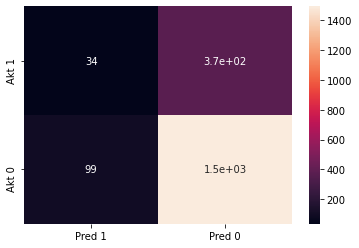

In [42]:
acc_KNN=accuracy_score(y_test,KNN_pred)
prec_KNN=precision_score(y_test,KNN_pred)
recal_KNN=recall_score(y_test,KNN_pred)
f1_KNN=f1_score(y_test,KNN_pred)

print(classification_report(y_test,KNN_pred))

cm_KNN=confusion_matrix(y_test,KNN_pred,labels=[1,0])

df_cm_KNN=pd.DataFrame(data=cm_KNN,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])

sns.heatmap(df_cm_KNN,annot=True)
plt.show()

### XG BOOST

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1593
           1       0.42      0.14      0.21       407

    accuracy                           0.79      2000
   macro avg       0.62      0.55      0.54      2000
weighted avg       0.73      0.79      0.74      2000



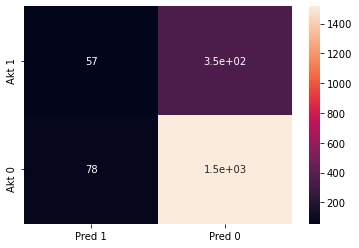

In [43]:
acc_XGB=accuracy_score(y_test,XGB_pred)
prec_XGB=precision_score(y_test,XGB_pred)
recal_XGB=recall_score(y_test,XGB_pred)
f1_XGB=f1_score(y_test,XGB_pred)

print(classification_report(y_test,XGB_pred))

cm_XGB=confusion_matrix(y_test,XGB_pred,labels=[1,0])

df_cm_XGB=pd.DataFrame(data=cm_XGB,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])

sns.heatmap(df_cm_XGB,annot=True)
plt.show()

In [47]:
data = {
    "K Nearest Neighbors" : [acc_KNN, prec_KNN, recal_KNN, f1_KNN],
    "Logistic Regression" : [acc_LogReg, prec_LogReg, recal_LogReg, f1_LogReg],
    "XG Boost" : [acc_XGB, prec_XGB, recal_XGB, f1_XGB]
}

pd.DataFrame(data=data, index=['Accuracy', 'Precission', 'Recall', 'F1 Score'])

,K Nearest Neighbors,Logistic Regression,XG Boost
Accuracy,0.764000,0.7965,0.786000
Precission,0.255639,0.0000,0.422222
Recall,0.083538,0.0000,0.140049
F1 Score,0.125926,0.0000,0.210332


## Hyperparameter Tuning

In [50]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

### XGB Tuning

In [57]:
XGB_tuned =XGBClassifier()
param_XGB_tuned = {'max_depth': [3, 2, 4, 5],
                 'learning_rate': [0.1, 0.3],
                 'n_estimator': [900],
                 'gamma': [0, 0.5, 0.7],
                 'colsample_bytree': [1, 1.4, 0.5],
                 'subsample':[1],
                 'reg_alpha':[0, 0.5, 1.0],
                 'reg_lambda':[1, 1.5, 2.1]}

model_XGB_tuned = GridSearchCV(XGB_tuned, param_XGB_tuned, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)
model_XGB_tuned.fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2156 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2804 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  6.1min finished


[14:10:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [1, 1.4, 0.5],
                         'gamma': [0, 0.5, 0.7], 'learning_rate': [0.1, 0.3],
                       

In [71]:
XGB_tuned = model_XGB_tuned.best_estimator_
y_XGB_tuned = XGB_tuned.predict(x_test)

XGB_tuned_train = XGB_tuned.score(x_train,y_train)

print('Training Score for XGB tuned model: ', XGB_tuned.score(x_train,y_train))
print('Testing Score for XGB tuned model: ', XGB_tuned.score(x_test, y_test))
print('\n\n\nXGB tuned model is Overfit nor Underfit')

Training Score for XGB tuned model:  0.8055
Testing Score for XGB tuned model:  0.801



XGB tuned model is Overfit nor Underfit


In [90]:
print('Accuracy Model tuned XGB: ',acc_tuned_XGB)
print('\n\n',classification_report(y_test, y_XGB_tuned))

Accuracy Model tuned XGB:  0.801


               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1593
           1       0.59      0.07      0.13       407

    accuracy                           0.80      2000
   macro avg       0.70      0.53      0.51      2000
weighted avg       0.76      0.80      0.73      2000



### KNN Tuning

In [63]:
KNN_tuned = KNeighborsClassifier()
param_KNN = {'n_neighbors':[1,2,3,4,5,6,7],
               'weights':['uniform','distance'],
               'p':[2, 1],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'leaf_size':[50, 60, 70]}

model_KNN_tuned = GridSearchCV(estimator = KNN_tuned, param_grid = param_KNN, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_KNN_tuned.fit(x_train, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 1326 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [50, 60, 70],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [88]:
KNN_tuned = model_KNN_tuned.best_estimator_
y_tuned_KNN = KNN_tuned.predict(x_test)

KNN_tuned_train = KNN_tuned.score(x_train, y_train)
print('Training accuracy score KNN tuned : ', KNN_tuned.score(x_train, y_train))
print('Testing accuracy score KNN tuned : ', KNN_tuned.score(x_test, y_test))
print('\n\n\nKNN Tuned model is Overfit nor Underfit')

Training accuracy score KNN tuned :  0.8065
Testing accuracy score KNN tuned :  0.79



KNN Tuned model is Overfit nor Underfit


In [89]:
acc_tuned_KNN = accuracy_score(y_test, y_tuned_KNN)

print(classification_report(y_test, y_tuned_KNN))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1593
           1       0.36      0.04      0.07       407

    accuracy                           0.79      2000
   macro avg       0.58      0.51      0.48      2000
weighted avg       0.71      0.79      0.72      2000



### Logistic Regression Tuning

In [83]:
logreg_tuned = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned = GridSearchCV(estimator = logreg_tuned, param_grid = param_logreg, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'accuracy')
model_logreg_tuned.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  68 out of  75 | elapsed:    7.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    7.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [91]:
logreg_tuned = model_logreg_tuned.best_estimator_
y_tuned_logreg = logreg_tuned.predict(x_test)

logreg_tuned_train = logreg_tuned.score(x_train, y_train)
print('train accuracy logreg tuned: ', logreg_tuned.score(x_train, y_train))
print('test accuracy logreg tuned: ', logreg_tuned.score(x_test, y_test))
print('\n\n\nKNN Tuned model is Overfit nor Underfit')

train accuracy logreg tuned:  0.79625
test accuracy logreg tuned:  0.7965



KNN Tuned model is Overfit nor Underfit


In [92]:
acc_tuned_logreg = accuracy_score(y_test, y_tuned_logreg)

print(classification_report(y_test, y_tuned_logreg))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



## Hyper parameter Tuning - Evaluation Model

### XG Boost -Tuned

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1593
           1       0.59      0.07      0.13       407

    accuracy                           0.80      2000
   macro avg       0.70      0.53      0.51      2000
weighted avg       0.76      0.80      0.73      2000



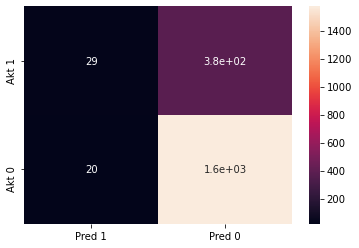

In [94]:
acc_XGB_tuned=accuracy_score(y_test,y_XGB_tuned)
prec_XGB_tuned=precision_score(y_test,y_XGB_tuned)
recal_XGB_tuned=recall_score(y_test,y_XGB_tuned)
f1_XGB_tuned=f1_score(y_test,y_XGB_tuned)

print(classification_report(y_test,y_XGB_tuned))

cm_XGB_tuned=confusion_matrix(y_test,y_XGB_tuned,labels=[1,0])

df_cm_XGB_tuned=pd.DataFrame(data=cm_XGB_tuned,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])

sns.heatmap(df_cm_XGB_tuned,annot=True)
plt.show()

### KNN - Tuned

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1593
           1       0.36      0.04      0.07       407

    accuracy                           0.79      2000
   macro avg       0.58      0.51      0.48      2000
weighted avg       0.71      0.79      0.72      2000



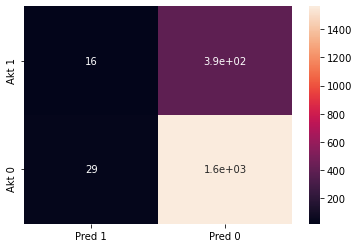

In [97]:
acc_KNN_tuned=accuracy_score(y_test,y_tuned_KNN)
prec_KNN_tuned=precision_score(y_test,y_XGB_tuned)
recal_KNN_tuned=recall_score(y_test,y_tuned_KNN)
f1_KNN_tuned=f1_score(y_test,y_tuned_KNN)

print(classification_report(y_test,y_tuned_KNN))

cm_KNN_tuned=confusion_matrix(y_test,y_tuned_KNN,labels=[1,0])

df_cm_KNN_tuned=pd.DataFrame(data=cm_KNN_tuned,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])

sns.heatmap(df_cm_KNN_tuned,annot=True)
plt.show()

### Logistic Regression - Tuned

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



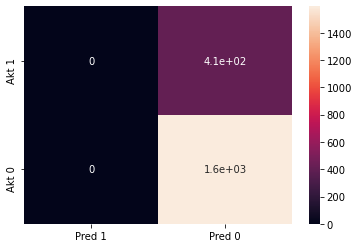

In [100]:
acc_logreg_tuned=accuracy_score(y_test,y_tuned_logreg)
prec_logreg_tuned=precision_score(y_test,y_tuned_logreg)
recal_logreg_tuned=recall_score(y_test,y_tuned_logreg)
f1_logreg_tuned=f1_score(y_test,y_tuned_logreg)

print(classification_report(y_test,y_tuned_logreg))

cm_logreg_tuned=confusion_matrix(y_test,y_tuned_logreg,labels=[1,0])

df_cm_logreg_tuned=pd.DataFrame(data=cm_logreg_tuned,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])

sns.heatmap(df_cm_logreg_tuned,annot=True)
plt.show()

In [108]:
data = {
    "K Nearest Neighbors" : [(accuracy_score(y_test,KNN_pred)),(accuracy_score(y_train,KNN_pred_train))],
    "Logistic Regression" : [(accuracy_score(y_test,Logreg_pred)),(accuracy_score(y_train,Logreg_pred_train))],
    "XG Boost" : [(accuracy_score(y_test,XGB_pred)),(accuracy_score(y_train,XGB_pred_train))],
    "KNN Tuned" : [(KNN_tuned.score(x_test, y_test)), (KNN_tuned.score(x_train, y_train))],
    "Logistic Regression Tuned"  : [(logreg_tuned.score(x_test, y_test)),(logreg_tuned.score(x_train, y_train))],
    "XG Boost Tuned" : [(XGB_tuned.score(x_test,y_test)),(XGB_tuned.score(x_train,y_train))],
}
pd.DataFrame(data=data, index=['Accuracy Testing', 'Accuracy Training'])

,K Nearest Neighbors,Logistic Regression,XG Boost,KNN Tuned,Logistic Regression Tuned,XG Boost Tuned
Accuracy Testing,0.764000,0.79650,0.786000,0.7900,0.79650,0.8010
Accuracy Training,0.816125,0.79625,0.891875,0.8065,0.79625,0.8055


## EXPORT MODEL

In [109]:
import joblib

In [110]:
joblib.dump(model_XGB_tuned,'Churn Prediction')

['Churn Prediction']

# **Conclusion**

### - Accuracy is being used, since we got considerably balanced dataset. 
    - **The majority is reaching only 79%.**

### - It is clear see that from all the evaluation matrix for this bank churn prediction, we see that, **Tuned XG Boost has the best accuracy with Score 0.801** when it comes to predicting churn based on certain selected features.


### - The data show, both overfit nor underfit model can be found. Testing Score are most likely clos to Traing score, both for base models and tuned models as well.


# **Recommendation & Improvement**

### 1. Improvement of the data itself needs to be done, by collecting proper values. 
**For Example, proper values for value in balance that is 0. This case can still be accepted through logical explanation, but further investigations might improve model's result.**

### 2. Different Models outside what being used can still be such an important for model selections. 
**For example: Random Forest Classifier, Dessicion Tree Classifier, and Support Vector Machine Classifier can still be applied to predict Customer Churn Prediction**


### 3. Not only applying various Different Models, but also Model's Improvements might produce different result.
**Adjusting each model's Parameter with different value should be undertaken furthermore.** 